## Importar Librerías y Cargar el Dataset

A continuación, vamos a importar las principales bibliotecas que usaremos y cargar el dataset en un DataFrame de pandas.

In [ ]:
# Importar librerías necesarias
import pandas as pd   # Para manejo de datos
import numpy as np    # Para cálculos numéricos
import matplotlib.pyplot as plt  # Para crear gráficos
import seaborn as sns  # Para visualización avanzada

# Cargar el dataset

df = pd.read_csv("wdbc.data", header=None) # Cargar el dataset sin encabezados

# Asignar nombres de columnas según la documentación del dataset
column_names = [
    "ID", "Diagnosis", 
    "Mean_Radius", "Mean_Texture", "Mean_Perimeter", "Mean_Area", "Mean_Smoothness",
    "Mean_Compactness", "Mean_Concavity", "Mean_Concave_Points", "Mean_Symmetry", "Mean_Fractal_Dimension",
    "SE_Radius", "SE_Texture", "SE_Perimeter", "SE_Area", "SE_Smoothness",
    "SE_Compactness", "SE_Concavity", "SE_Concave_Points", "SE_Symmetry", "SE_Fractal_Dimension",
    "Worst_Radius", "Worst_Texture", "Worst_Perimeter", "Worst_Area", "Worst_Smoothness",
    "Worst_Compactness", "Worst_Concavity", "Worst_Concave_Points", "Worst_Symmetry", "Worst_Fractal_Dimension"
]
df.columns = column_names

# Mostrar las primeras filas del dataset para confirmar que se cargó correctamente
print(df.head())


         ID Diagnosis  Mean_Radius  Mean_Texture  Mean_Perimeter  Mean_Area  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   Mean_Smoothness  Mean_Compactness  Mean_Concavity  Mean_Concave_Points  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  Worst_Radius  Worst_Texture  Worst_Perimeter  Worst_Ar

Columnas Relevantes:

La columna Diagnosis es nuestra variable objetivo. Su valor puede ser M (maligno) o B (benigno), y representa el tipo de diagnóstico del tumor.

Las demás columnas son características derivadas de mediciones (como Mean_Radius, Mean_Texture, Worst_Radius, etc.), que serán nuestras variables predictoras.

Cantidad de Características y Clases:

Contamos con 30 características numéricas (además de la columna Diagnosis).

Parece haber un ligero desbalance en las clases (benignos suelen ser más comunes que malignos), pero lo confirmaremos más adelante con un análisis exploratorio.

Siguiente Paso: Limpieza y Exploración:

Eliminar columnas irrelevantes como ID (no aporta información útil al modelo).

Convertir la columna Diagnosis en un formato numérico para facilitar el procesamiento.

## Paso 2: Limpieza y Exploración

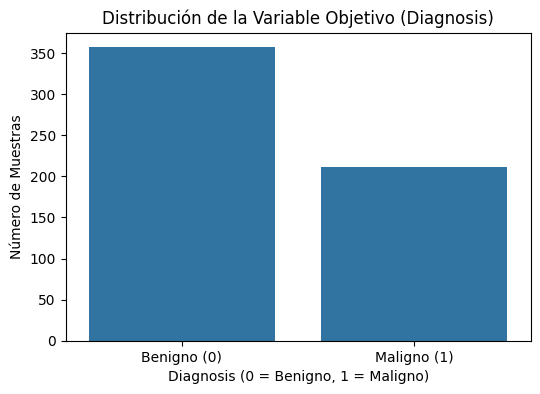

Valores faltantes por columna:
 Diagnosis                  0
Mean_Radius                0
Mean_Texture               0
Mean_Perimeter             0
Mean_Area                  0
Mean_Smoothness            0
Mean_Compactness           0
Mean_Concavity             0
Mean_Concave_Points        0
Mean_Symmetry              0
Mean_Fractal_Dimension     0
SE_Radius                  0
SE_Texture                 0
SE_Perimeter               0
SE_Area                    0
SE_Smoothness              0
SE_Compactness             0
SE_Concavity               0
SE_Concave_Points          0
SE_Symmetry                0
SE_Fractal_Dimension       0
Worst_Radius               0
Worst_Texture              0
Worst_Perimeter            0
Worst_Area                 0
Worst_Smoothness           0
Worst_Compactness          0
Worst_Concavity            0
Worst_Concave_Points       0
Worst_Symmetry             0
Worst_Fractal_Dimension    0
dtype: int64

Primeras filas del dataset limpio:
    Diagnosis  Mean_

In [3]:
# Paso 1: Eliminar la columna irrelevante "ID"
df = df.drop(columns="ID")

# Paso 2: Transformar la columna "Diagnosis" en valores numéricos (M -> 1, B -> 0)
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

# Paso 3: Verificar valores faltantes en el dataset
missing_values = df.isnull().sum()

# Paso 4: Visualizar la distribución de la variable objetivo
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.countplot(x="Diagnosis", data=df)
plt.title("Distribución de la Variable Objetivo (Diagnosis)")
plt.xlabel("Diagnosis (0 = Benigno, 1 = Maligno)")
plt.ylabel("Número de Muestras")
plt.xticks(ticks=[0, 1], labels=["Benigno (0)", "Maligno (1)"])
plt.show()

# Imprimir un resumen de valores faltantes y primeras filas para verificar la limpieza
print("Valores faltantes por columna:\n", missing_values)
print("\nPrimeras filas del dataset limpio:\n", df.head())


Distribución de la Variable Objetivo
La gráfica muestra que hay más muestras de tumores benignos (clase 0) que malignos (clase 1). El conteo es aproximadamente 350 benignos frente a 200 malignos, lo que indica un cierto desbalance de clases.

Impacto del Desbalance:
Un desbalance moderado como este puede:

Hacer que ciertos modelos (como KNN o SVM sin ajustes) favorezcan la clase mayoritaria.

Subestimar los casos malignos (clase minoritaria), lo que es crítico en un contexto médico.

## 3: Análisis Exploratorio de Datos (EDA)

 Este paso nos permitirá descubrir patrones, entender las distribuciones de las características y analizar la relación entre las variables predictoras y la variable objetivo (Diagnosis).

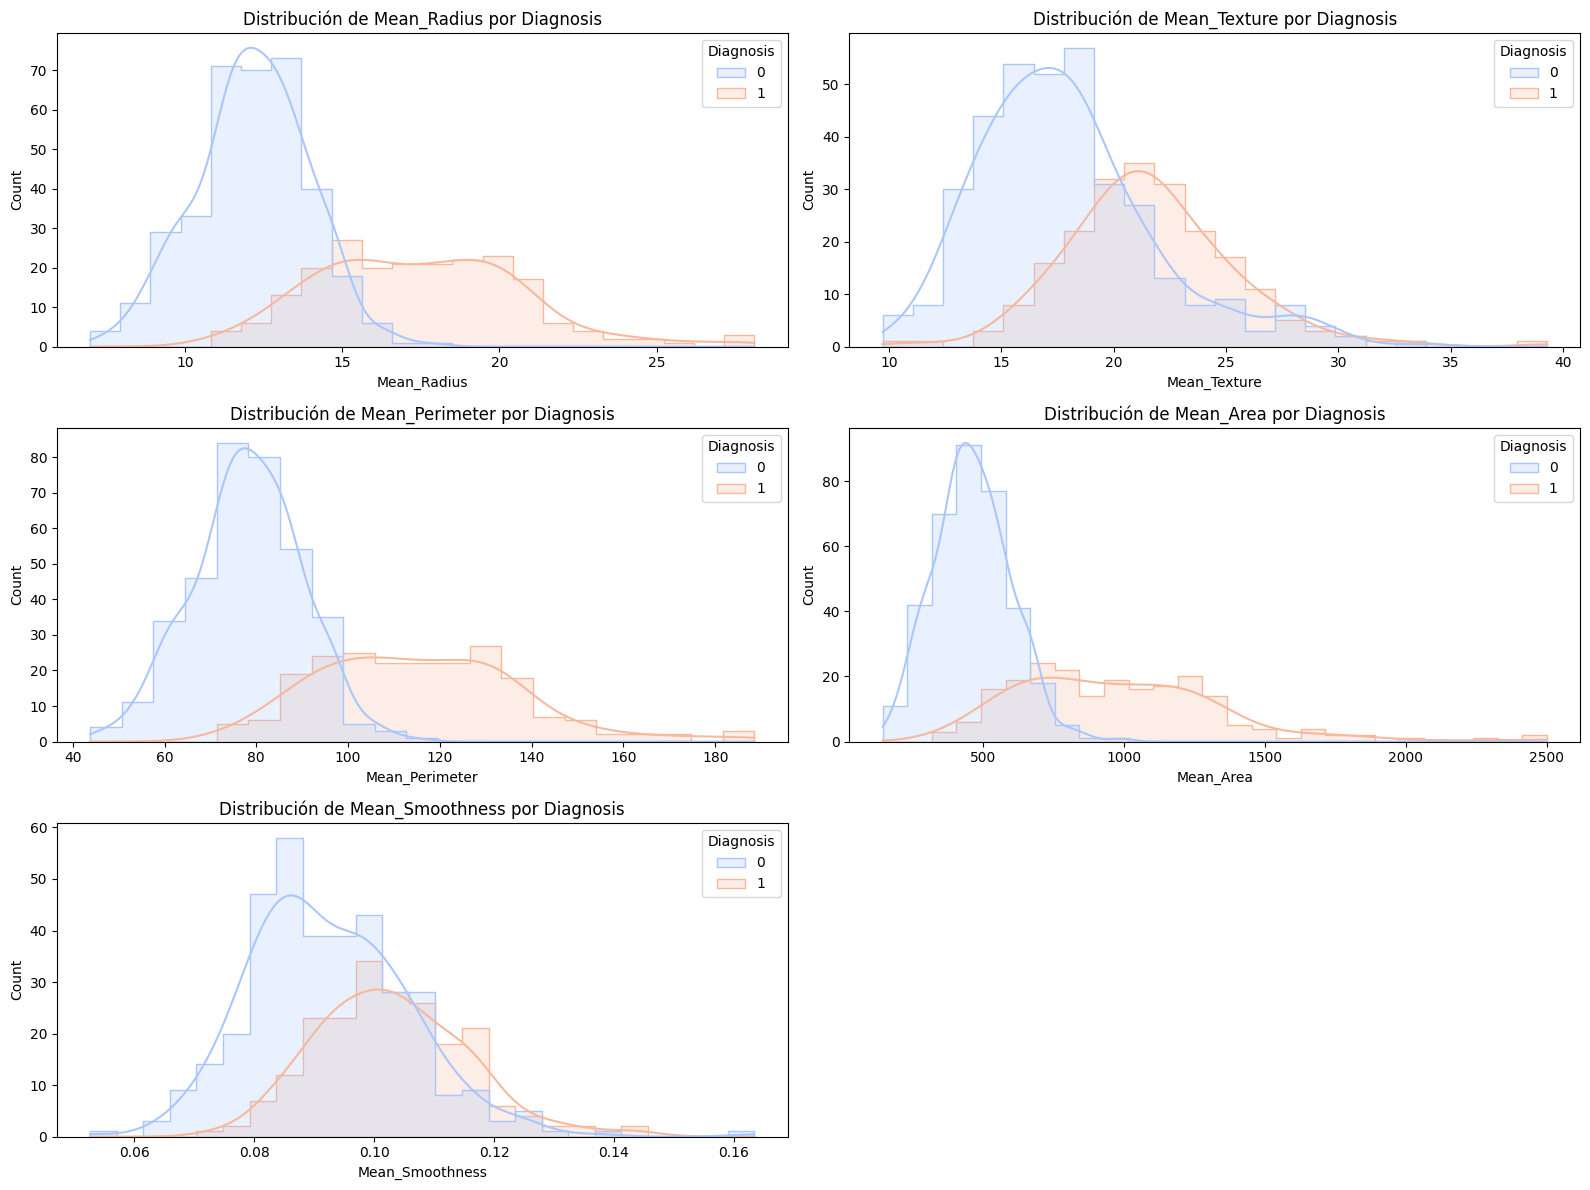

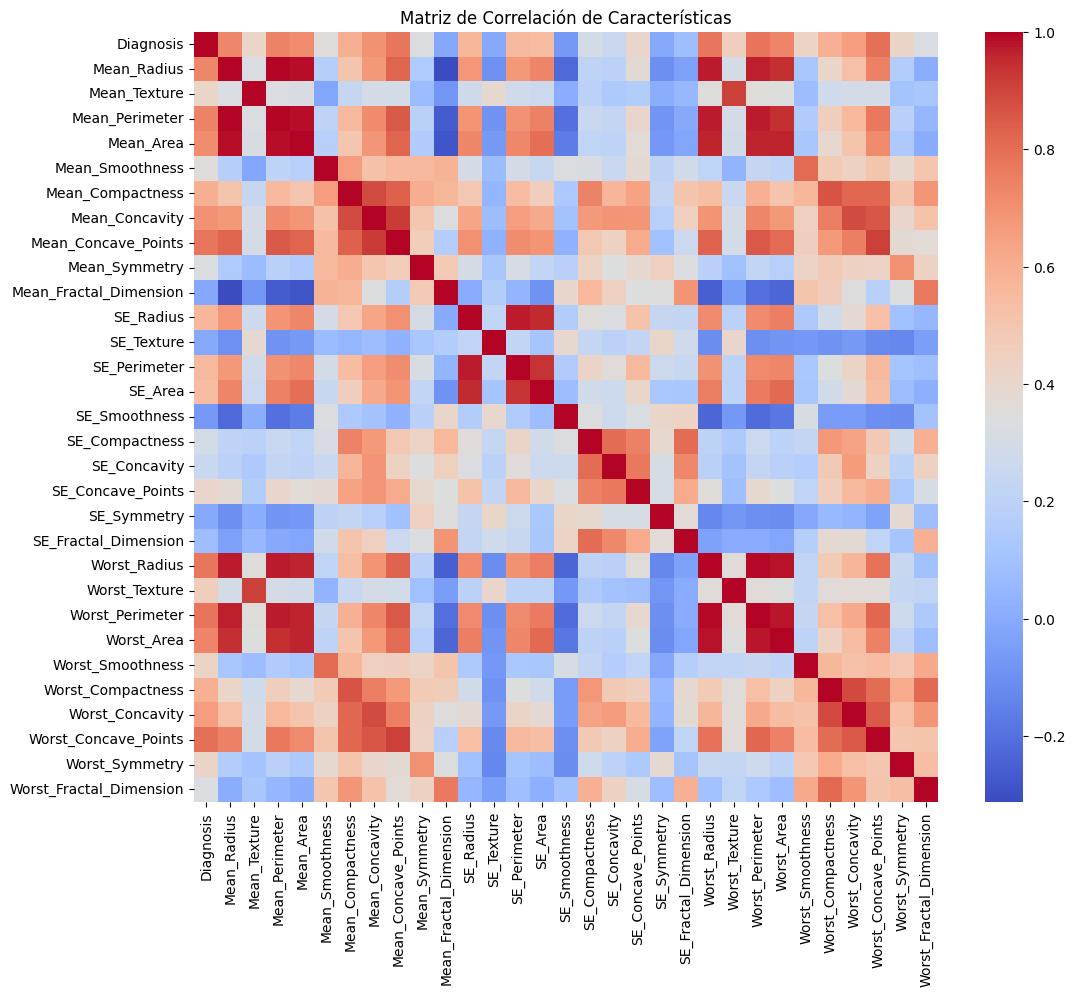

C:\Users\Propietario\AppData\Local\Temp\ipykernel_15352\3529589052.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diagnosis", y=feature, data=df, palette="coolwarm")
C:\Users\Propietario\AppData\Local\Temp\ipykernel_15352\3529589052.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diagnosis", y=feature, data=df, palette="coolwarm")
C:\Users\Propietario\AppData\Local\Temp\ipykernel_15352\3529589052.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Diagnosis", y=feature, data=df, palette="coolwarm")


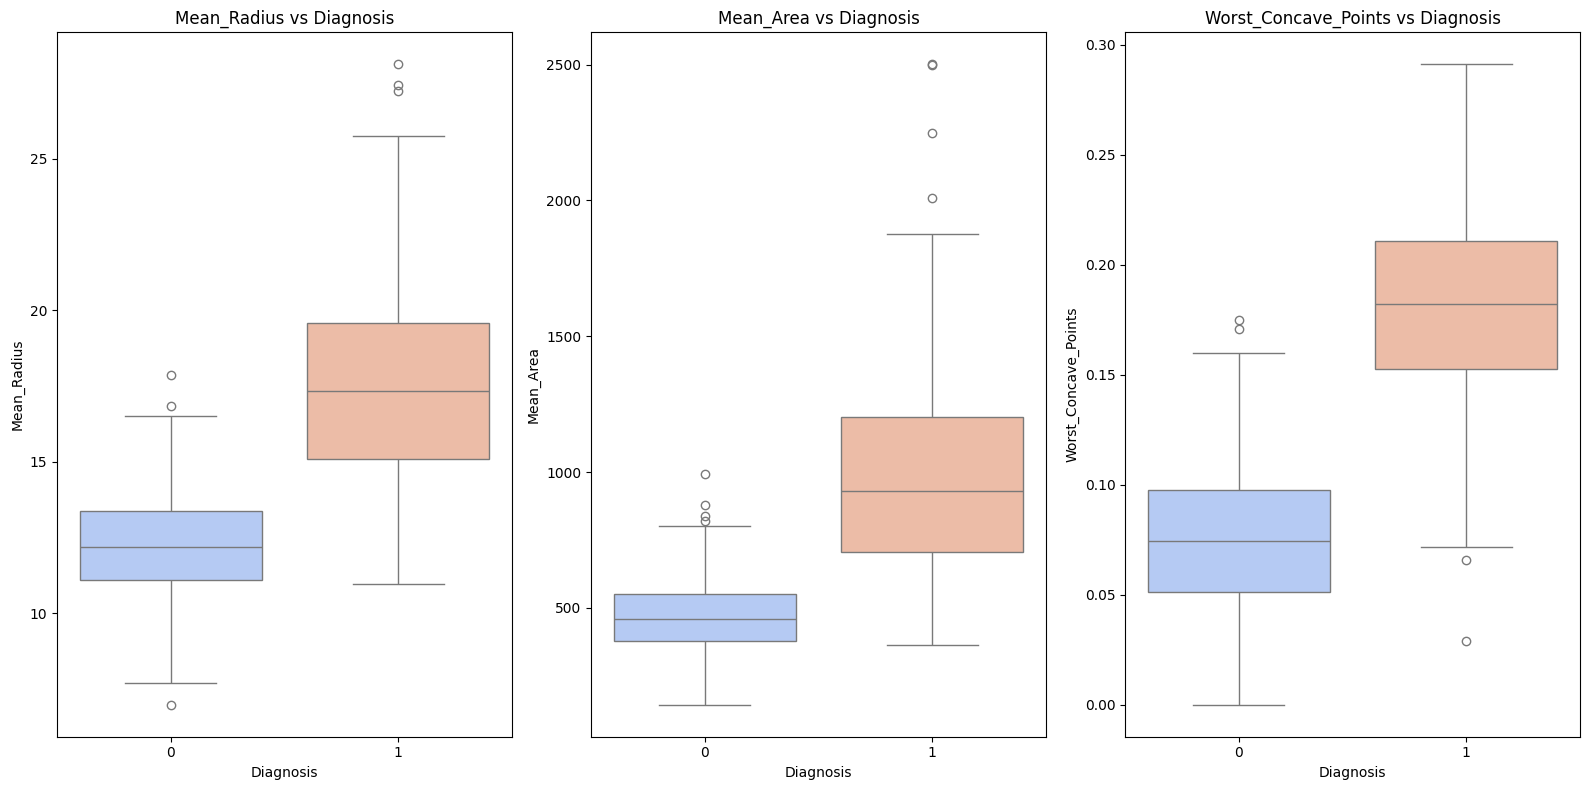

In [4]:
# Paso 1: Visualizar la distribución de las características clave


# Crear histogramas de algunas características representativas
plt.figure(figsize=(16, 12))
features = ["Mean_Radius", "Mean_Texture", "Mean_Perimeter", "Mean_Area", "Mean_Smoothness"]
for i, feature in enumerate(features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(data=df, x=feature, hue="Diagnosis", kde=True, element="step", palette="coolwarm")
    plt.title(f"Distribución de {feature} por Diagnosis")
plt.tight_layout()
plt.show()

# Paso 2: Matriz de correlación
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación de Características")
plt.show()

# Paso 3: Boxplots para observar relaciones con Diagnosis
plt.figure(figsize=(16, 8))
for i, feature in enumerate(["Mean_Radius", "Mean_Area", "Worst_Concave_Points"], 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x="Diagnosis", y=feature, data=df, palette="coolwarm")
    plt.title(f"{feature} vs Diagnosis")
plt.tight_layout()
plt.show()


Interpretación de las Boxplots
Mean_Radius vs Diagnosis:

Los tumores malignos (Diagnosis = 1) tienden a tener un Mean_Radius mayor en comparación con los benignos.

La mediana para los tumores malignos está claramente desplazada hacia valores altos.

Esto sugiere que un radio promedio más grande puede ser un indicador de malignidad.

Mean_Area vs Diagnosis:

El área promedio también muestra una relación similar a Mean_Radius, donde los tumores malignos tienen valores consistentemente mayores que los benignos.

Este patrón destaca que el tamaño del tumor (representado aquí por el área) podría ser un factor clave para clasificarlo como maligno.

Worst_Concave_Points vs Diagnosis:

Esta característica parece tener un mayor rango y mediana en los tumores malignos.

Los tumores malignos suelen tener más puntos cóncavos severos (irregularidades en los contornos del tumor), lo cual es un indicador morfológico de malignidad.

Importancia de Estos Análisis
Las diferencias observadas en las boxplots son relevantes porque:

Ayudan a identificar características importantes que probablemente tendrán un mayor peso predictivo en los modelos de Machine Learning.

Proporcionan intuiciones prácticas:

Por ejemplo, si una muestra tiene un Mean_Area muy bajo, es más probable que sea benigna (lo opuesto es cierto para valores altos).

Conclusión de las Boxplots
Estas gráficas indican que las características seleccionadas (Mean_Radius, Mean_Area y Worst_Concave_Points) son discriminativas y probablemente útiles para construir un modelo predictivo robusto.

Interpretación del Mapa de Calor
Colores y Correlación:

En este gráfico, los colores representan el grado de correlación entre pares de características:

Rojo oscuro: Correlación positiva alta (cercana a +1).

Azul oscuro: Correlación negativa alta (cercana a -1).

Blanco: Sin correlación (cercana a 0).

Diagonal Principal:

La línea diagonal de cuadrados rojos muestra la correlación perfecta de cada característica consigo misma (correlación = 1). Esto es esperado y no relevante para nuestro análisis.

Características Altamente Correlacionadas:

Algunas características tienen relaciones muy fuertes entre sí, como:

Mean_Radius, Mean_Perimeter y Mean_Area están fuertemente correlacionadas, lo cual tiene sentido porque el radio, el perímetro y el área representan diferentes dimensiones del tamaño del tumor.

Worst_Radius, Worst_Perimeter y Worst_Area también están altamente correlacionadas, lo que refuerza la relación entre las características geométricas.

Este tipo de correlación puede generar redundancia en el modelo.

Relación con Diagnosis:

Algunas características, como Worst_Radius, Worst_Area y Worst_Concave_Points, parecen tener una correlación notable con la variable objetivo Diagnosis. Esto sugiere que son importantes para clasificar un tumor como maligno o benigno.

Relevancia de Eliminar Correlaciones Altas
Evitar Redundancia de Información:

Características como Mean_Area y Mean_Perimeter aportan información similar. Incluir ambas puede aumentar la complejidad del modelo sin añadir valor predictivo.

Mejorar la Estabilidad del Modelo:

La alta correlación puede introducir multicolinealidad, que afecta negativamente a modelos como la Regresión Logística.

Optimizar Recursos:

Al eliminar variables redundantes, reducimos la dimensión del dataset, mejorando el tiempo de entrenamiento y evitando posibles problemas de sobreajuste.

Gráfica: Distribución de las Características por Diagnosis
Ejes y Leyenda:

En cada histograma:

El eje x representa los valores de una característica específica (por ejemplo, Mean_Radius o Mean_Area).

El eje y representa la cantidad de muestras (frecuencia) que tienen ese rango de valores.

Los colores distinguen las dos clases:

Azul: Tumores benignos (clase 0).

Naranja: Tumores malignos (clase 1).

Características Analizadas:

Mean_Radius: Promedio de los radios de los tumores.

Mean_Texture: Promedio de la variación en la textura.

Mean_Perimeter: Promedio del perímetro.

Mean_Area: Promedio del área.

Mean_Smoothness: Promedio de la suavidad del contorno.

Análisis de Cada Histograma
Mean_Radius:

Los tumores malignos (naranja) tienen radios promedio más grandes que los tumores benignos (azul), con un pico claro en valores altos.

Esto indica que un mayor radio podría ser un indicador de malignidad.

Mean_Texture:

La textura promedio tiene menos diferenciación entre benignos y malignos, mostrando una superposición significativa entre ambas clases.

Podría no ser una característica clave por sí sola, pero en combinación con otras podría ser útil.

Mean_Perimeter:

Similar al radio, los valores más altos del perímetro promedio se asocian con tumores malignos.

Esto refuerza la importancia de características relacionadas con el tamaño del tumor.

Mean_Area:

Al igual que el radio y el perímetro, los tumores malignos muestran áreas promedio considerablemente mayores.

La separación entre clases es notable.

Mean_Smoothness:

La suavidad promedio tiene un comportamiento más mezclado entre benignos y malignos, lo que sugiere que no es tan discriminativa como las características geométricas (radio, perímetro, área).

Conclusión de la Gráfica
Características clave: Mean_Radius, Mean_Perimeter y Mean_Area muestran buenas separaciones entre las clases benignas y malignas, lo que las hace candidatas importantes para el modelado.

Características menos discriminativas: Mean_Texture y Mean_Smoothness parecen tener menos impacto directo, pero podrían ser útiles en conjunto con otras características.

In [5]:
# Guardar el dataset limpio en un archivo CSV
#
df.to_csv("visualizacion_limpieza_eda.csv", index=False)

print("El dataset ha sido guardado exitosamente como 'visualizacion_limpieza_eda.csv'.")


El dataset ha sido guardado exitosamente como 'visualizacion_limpieza_eda.csv'.
